# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#initialize variables
weather_cities = {}
counter = 1
set_counter = 1

#formatting print statement
print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
    response = requests.get(base_url).json()
    #try to store all desired data of city in a tuple
    try:
        data = (Lat, Lng, Max_Temp, Humidity, Cloudiness, Wind_Speed, Country, Date) = (
            response['coord']['lat'], 
            response['coord']['lon'],
            response['main']['temp_max'],
            response['main']['humidity'],
            response['clouds']['all'],
            response['wind']['speed'],
            response['sys']['country'],
            response['dt']
        )
        #add tuple to dictionary with city name being the key
        weather_cities[city] = data
        print(f'Processing Record {counter} of Set {set_counter} | {city}')
    except:
        #if the city is not found, print that
        print('City not found. Skipping...')
    
    #pause for two seconds after 50 calls, not sure what is appriopiate here
    if counter == 50:
        counter = 0
        set_counter += 1
        time.sleep(2)
    counter += 1
    
print("-----------------------------")
print("Data Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | olafsvik
Processing Record 4 of Set 1 | valdivia
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | rikitea
City not found. Skipping...
Processing Record 9 of Set 1 | sosnogorsk
Processing Record 10 of Set 1 | rio grande
Processing Record 11 of Set 1 | jeremie
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | kosum phisai
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sabla
Processing Record 16 of Set 1 | marseille
Processing Record 17 of Set 1 | blagoyevo
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | guanica
Processing Record 20 of Set 1 | kulhudhuffushi
Processing Record 21 of Set 1 | nantong
Processing Record 22 of Set 1 | la palma
Processing Record 23 of Set 1 | magistralnyy
P

Processing Record 5 of Set 5 | lyuban
Processing Record 6 of Set 5 | marawi
Processing Record 7 of Set 5 | hobart
Processing Record 8 of Set 5 | dickinson
Processing Record 9 of Set 5 | kostino
Processing Record 10 of Set 5 | kirakira
Processing Record 11 of Set 5 | weihe
Processing Record 12 of Set 5 | sazonovo
Processing Record 13 of Set 5 | puerto carreno
Processing Record 14 of Set 5 | port lincoln
Processing Record 15 of Set 5 | labuhan
Processing Record 16 of Set 5 | tambo
Processing Record 17 of Set 5 | kisangani
Processing Record 18 of Set 5 | skeldon
Processing Record 19 of Set 5 | chokurdakh
Processing Record 20 of Set 5 | port hedland
Processing Record 21 of Set 5 | clyde river
Processing Record 22 of Set 5 | kloulklubed
Processing Record 23 of Set 5 | ryotsu
Processing Record 24 of Set 5 | nata
Processing Record 25 of Set 5 | taoudenni
Processing Record 26 of Set 5 | pell city
Processing Record 27 of Set 5 | padang
Processing Record 28 of Set 5 | mount gambier
Processing Re

Processing Record 10 of Set 9 | sisimiut
Processing Record 11 of Set 9 | kahului
Processing Record 12 of Set 9 | college
Processing Record 13 of Set 9 | kurchum
Processing Record 14 of Set 9 | taos
Processing Record 15 of Set 9 | auki
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 9 | disa
Processing Record 19 of Set 9 | iguape
Processing Record 20 of Set 9 | xinpu
Processing Record 21 of Set 9 | kolpashevo
Processing Record 22 of Set 9 | figeac
Processing Record 23 of Set 9 | bima
City not found. Skipping...
City not found. Skipping...
Processing Record 26 of Set 9 | cidreira
Processing Record 27 of Set 9 | belozerskoye
Processing Record 28 of Set 9 | kutum
Processing Record 29 of Set 9 | zhicheng
Processing Record 30 of Set 9 | yuzhno-kurilsk
Processing Record 31 of Set 9 | muleba
Processing Record 32 of Set 9 | beausejour
City not found. Skipping...
Processing Record 34 of Set 9 | lexington
Processing Record 35 of Set 9 | seoul
Processing Record 

Processing Record 13 of Set 13 | husavik
Processing Record 14 of Set 13 | sretensk
Processing Record 15 of Set 13 | santa cruz
Processing Record 16 of Set 13 | matagami
Processing Record 17 of Set 13 | sola
Processing Record 18 of Set 13 | ambatondrazaka
Processing Record 19 of Set 13 | linkoping
Processing Record 20 of Set 13 | pavilosta
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create data frame using the above created dictionary
weather_df = pd.DataFrame(weather_cities)
#transpose the data frame
weather_df = weather_df.T
#place city in a column 
weather_df.reset_index(inplace = True)
#rename columns
weather_df.columns = ['City', 'Lat', 'Lng', 'Max_Temp', 'Humidity', 
                          'Cloudiness', 'Wind_Speed', 'Country', 'Data']
#round lat and lng
weather_df['Lat'] = weather_df['Lat'].map(lambda x: round(x, 2))
weather_df['Lng'] = weather_df['Lng'].map(lambda x: round(x, 2))

#format columns as float
weather_df['Max_Temp'] = weather_df['Max_Temp'].astype(float)
weather_df['Humidity'] = weather_df['Humidity'].astype(float)
weather_df['Cloudiness'] = weather_df['Cloudiness'].astype(float)
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].astype(float)

weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Data
0,nikolskoye,59.70,30.79,44.60,70.0,75.0,6.71,RU,1619163102
1,punta arenas,-53.15,-70.92,44.60,100.0,90.0,3.44,CL,1619163103
2,olafsvik,64.89,-23.71,42.17,91.0,100.0,16.40,IS,1619163103
3,valdivia,-39.81,-73.25,50.00,100.0,90.0,2.30,CL,1619163104
4,yellowknife,62.46,-114.35,12.20,62.0,90.0,4.61,CA,1619163104


In [5]:
weather_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,19.288922,17.943993,62.317420,67.095406,52.222615,8.298145
std,32.316258,90.821881,20.955607,23.545807,40.060749,5.752624
min,-54.800000,-179.170000,-3.230000,1.000000,0.000000,0.340000
25%,-6.595000,-65.317500,46.227500,54.000000,10.000000,4.410000
50%,22.080000,19.845000,66.200000,72.000000,53.000000,6.910000
75%,46.235000,98.647500,78.800000,85.000000,93.750000,10.420000
max,78.220000,178.420000,105.750000,100.000000,100.000000,36.130000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_values = weather_df.Humidity.unique()
over100 = False 
for humidity in humidity_values:
    if humidity > 100:
        print('More work to do...')
        over100 = True
if(not(over100)):
    print('SKIP THE BELOW STEPS')

SKIP BELOW WORK


In [7]:
#export data 
weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

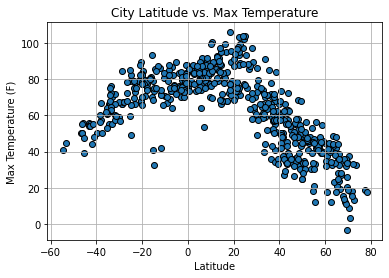

In [9]:
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.scatter(weather_df['Lat'], weather_df['Max_Temp'], edgecolors='black')
plt.savefig('output_data/LatvsTemp.png')
plt.show()

The above plot analyizes a cities Temperature based on where it is placed vertically on the globe. You can see that the temperature tends to be higher the closer to the equater (latitude = 0) the city is and colder as you move further away. 

## Latitude vs. Humidity Plot

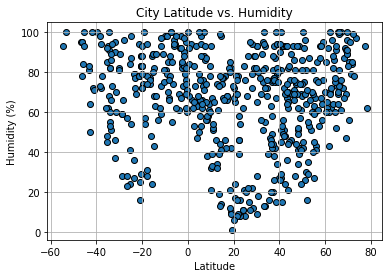

In [10]:
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black')
plt.savefig('output_data/LatvsHumidity.png')
plt.show()

The above plot analyizes a cities Humidity based on where it is placed vertically on the globe. We can see around the equater (latitude = 0), every cities humidity is about 60% or greater. Outside the equater there is much more variability. 

## Latitude vs. Cloudiness Plot

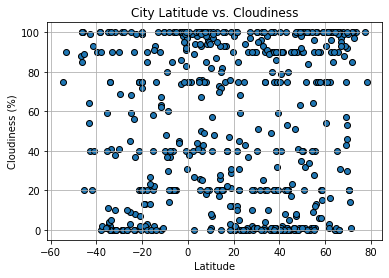

In [11]:
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors='black')
plt.savefig('output_data/LatvsCloudiness.png')
plt.show()

The above plot analyizes a cities Cloudiness based on where it is placed vertically on the globe. The is no recognizable pattern between these to variables, so it is unlikely that a cities location directly affects the amount of clouds observed.

## Latitude vs. Wind Speed Plot

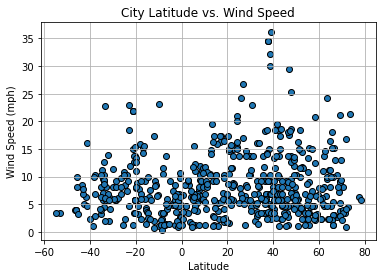

In [12]:
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.scatter(weather_df['Lat'], weather_df['Wind_Speed'], edgecolors='black')
plt.savefig('output_data/LatvsWindSpeed.png')
plt.show()

The above plot analyizes a cities Wind Speed based on where it is placed vertically on the globe. There is no recognizable pattern between these two variables. However, some latitudes seem to have higher wind speeds (latitude =40). We should check other days to verify if that is a consistent pattern though.

## Linear Regression

In [13]:
northern_hem = weather_df.loc[weather_df.Lat >= 0,:]
southern_hem = weather_df.loc[weather_df.Lat < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8547441365725578


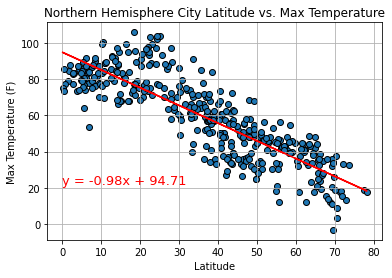

In [14]:
x_axis = northern_hem['Lat']
y_axis = northern_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(0,22),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/NorthLatvsTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6720640607694139


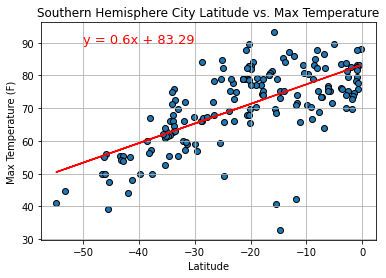

In [15]:
x_axis = southern_hem['Lat']
y_axis = southern_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(-50,90),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/SouthLatvsTemp.png')
plt.show()

The above scatter plots show temperature changes based on distance from the equator, one north one south. Both show that the further form the equator you get, that the temperature decreases. However, there appears to be a much stronger linearly relationship in the northern hemisphere, which has an r-value of .85.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18712692049298374


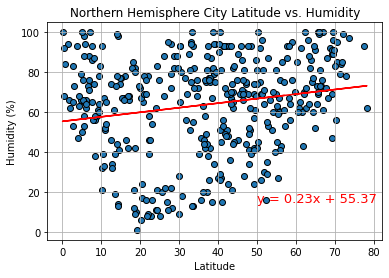

In [16]:
x_axis = northern_hem['Lat']
y_axis = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(50,15),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/NorthLatvsHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.028682390904898127


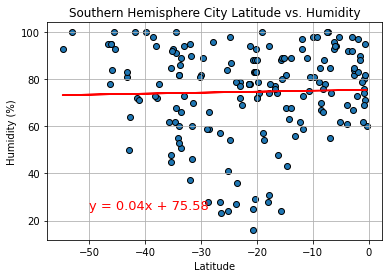

In [17]:
x_axis = southern_hem['Lat']
y_axis = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(-50,25),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/SouthLatvsHumidity.png')
plt.show()

The above scatter plots show humidty changes based on distance from the equator, one north one south. Neither show a discerable pattern between humidity and latitude. Furthermore, neither r-value is particularly significant.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01797739029152871


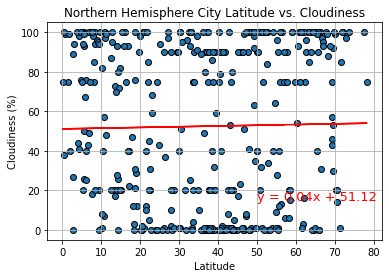

In [18]:
x_axis = northern_hem['Lat']
y_axis = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(50,15),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/NorthLatvsClouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1316885167423569


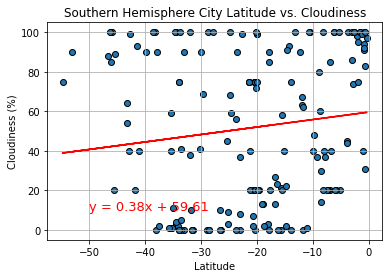

In [19]:
x_axis = southern_hem['Lat']
y_axis = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(-50,10),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/SouthLatvsClouds.png')
plt.show()

The above scatter plots show cloudiness changes based on distance from the equator, one north one south. Neither show a discerable pattern between cloudiness and latitude. Furthermore, neither r-value is particularly significant.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009298900981815817


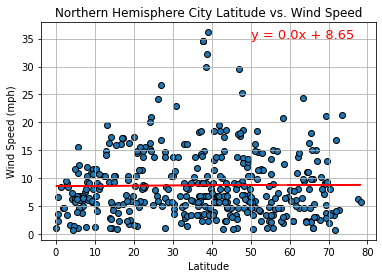

In [20]:
x_axis = northern_hem['Lat']
y_axis = northern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(50,35),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/NorthLatvsWind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10684250805774424


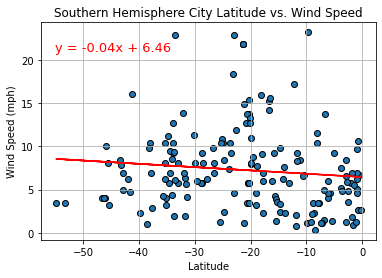

In [21]:
x_axis = southern_hem['Lat']
y_axis = southern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The r-value is: {rvalue}")

#calculate regression line values
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, color = 'r')
plt.annotate(line_eq,(-55,21),fontsize=13,color="red")

#plot set up
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed')
plt.grid()
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.savefig('output_data/SouthLatvsWind.png')
plt.show()

The above scatter plots show wind speed changes based on distance from the equator, one north one south. Neither show a discerable pattern between wind speed and latitude. Furthermore, neither r-value is particularly significant.